## **<u> Imports <u>**

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import warnings

warnings.filterwarnings("ignore")

## **<u> Question 1 <u>**


On pose $x = (\alpha,\beta,\delta,γ, y_{0},z_{0}) \in \mathbb{R}^{6}.$

$$
\begin{cases} 
\frac{dy(t)}{dt} = y(t)(\alpha - \beta z(t)\\
\frac{dz(t)}{dt} = z(t)(\delta y (t) - \gamma)\\
\end{cases}
$$

Nous résolvons le système par la méthode des éléments finis.
Pour ce faire:
$$
\begin{cases} 
\frac{y_{t_{i+1}}-y_{t_{i}}}{\Delta t_{i}} = y_{t_{i}}(\alpha - \beta z_{t_{i}})\\
\frac{z_{t_{i+1}}-z_{t_{i}}}{\Delta t_{i}} = z_{t_{i}}(\delta y_{t_{i}} - \gamma)\\
\end{cases}
$$
en prenant $n$ pas de temps pour une année, ie $\Delta t_{i} = dt = \frac{1}{n}$, ce qui se reécrit: 

$$
\begin{cases} 
y_{t_{i+1}} = y_{t_{i}}(1 + dt(\alpha - \beta z_{t_{i}}))\\
z_{t_{i+1}} = z_{t_{i}}(1 + dt(\delta y_{t_{i}} - \gamma ))\\
\end{cases}
$$
On peut alors obtenir $y_{T}$ et $z_{T}$ itérativement





In [95]:
## Question 1. Résolution du système (1) pour un horizon de temps T
## Méthode des éléments finis

def sol_systeme (x, T) : 
    '''
    Entrées : 
    x : taille 6, paramètre du système d'évolution
    T : Horizon de Temps
    
    Sorties : 
    y , z : vecteurs de taille T+1, population de proies et prédateurs respectivement, de t0 à t0+T
    '''
    n = 100 # nombre de Pas de temps sur une année
    dt = 1./n
    
    y = np.zeros(T+1)
    z = np.zeros(T+1)
    
    ##initialisation au temps t_i
    y_0 = x[4]
    z_0 = x[5]
    
    ## initialisation au temps t_{i+1}
    y_1 = 0
    z_1 = 0
    for i in range(n*T):
        y_1 = y_0*(1 + dt*(x[0] - x[1]*z_0))
        z_1 = z_0*(1 + dt*(-x[3] + x[2]*y_0))
        
        ##  On conserve la solution aux dates entières (en années)
        if (i%n == 0) :
            y[i//n] = y_0
            z[i//n] = z_0
        y_0 = y_1
        z_0 = z_1
    y[T] = y_0
    z[T] = z_0
    
    return y,z

## **<u> Question 2 <u>**

Nous devons tout d'abord exprimer $\lambda$ et $\zeta^{2}$ (moyenne et variance de $\ln(X))$ en fonction de $\mu$ et $\sigma^{2}$ (moyenne et variance de $X$), étant donné que l'on a:
$$
\begin{cases} 
\mu = exp(\lambda + \frac{\zeta^{2}}{2}) \\
\sigma^{2} = exp(\,2\lambda + \zeta^{2})\,(exp(\zeta^{2})-1)\\
\end{cases}
$$


La résolution de ce système nous permet d'obtenir: $$
\begin{cases} 
\lambda = \ln(\mu) - \frac{1}{2}\ln(\, 1 + \frac{\sigma^{2}}{\mu^{2}}) \\
\zeta^{2} = \ln(\, 1 + \frac{\sigma^{2}}{\mu^{2}})\\
\end{cases}
$$


Puisque $\ln(X) \sim \mathcal{N}(\lambda,\,\zeta^{2})$, on tire différents échantillons de la loi $\mathcal{N}(\lambda,\,\zeta^{2})$, une réalisation de $x$ est alors obtenue en passant à l'exponentielle.

In [96]:
## Question 2. Lois de y et z par échantillonnage de Monte Carlo

## 2.1 Simulation du paramètre x 

### Données
mu_alpha = 0.5
sigma_alpha = 0.2
mu_beta = 0.05
sigma_beta = 0.02
mu_delta = 0.05
sigma_delta = 0.02
mu_gamma = 0.5
sigma_gamma = 0.2


lambda_y0 = np.log(10)
zeta_y0 = 1.
lambda_z0 = np.log(10)
zeta_z0 = 1.



## lambda - zeta sont nécessaires pour simuler x
## Tandis que mu - sigma permettent de définir la densité de la loi à priori de x (voir question 6)... ou peut-être pas
def compute_mu_sigma (lambda_, zeta_) : 
    """
    Calcule le mu et le sigma d'une log_normale à partir de lambda et zeta
    """
    mu = np.exp(lambda_ + zeta_**2/2)
    sigma2 = np.exp(2*lambda_ + 2*zeta_**2) - mu**2
    
    return mu, np.sqrt(sigma2)
def compute_lamba_zeta(mu_, sigma_) :
    """
    Calcule le lambda et le zeta d'une log_normale à partir de mu et sigma
    """    
    zeta2 = np.log(1 + (sigma_/mu_)**2)
    lambda_ =  np.log(mu_) - 0.5*zeta2
    
    return lambda_, np.sqrt(zeta2)

## On peut maintenant compléter nos informations sur la loi à priori de x
mu_y0, sigma_y0 = compute_mu_sigma(lambda_y0, zeta_y0)
mu_z0, sigma_z0 = compute_mu_sigma(lambda_z0, zeta_z0)

lambda_alpha, zeta_alpha = compute_lamba_zeta(mu_alpha, sigma_alpha)
lambda_beta, zeta_beta = compute_lamba_zeta(mu_beta, sigma_beta)
lambda_delta, zeta_delta = compute_lamba_zeta(mu_delta, sigma_delta)
lambda_gamma, zeta_gamma = compute_lamba_zeta(mu_gamma, sigma_gamma)


## Moyennes et écart-types de x
Mu = np.array([mu_alpha, mu_beta, mu_delta, mu_gamma, mu_y0, mu_z0])
Sigma = np.array([sigma_alpha, sigma_beta, sigma_delta, sigma_gamma, sigma_y0, sigma_z0])

## Moyennes et écart-types de ln(x), vecteur gaussien
Lambda = np.array([lambda_alpha, lambda_beta, lambda_delta, lambda_gamma, lambda_y0, lambda_z0])
Zeta = np.array([zeta_alpha, zeta_beta, zeta_delta, zeta_gamma, zeta_y0, zeta_z0])


In [97]:
compute_mu_sigma(np.log(10),1.)

(16.487212707001284, 21.611974158950883)

In [98]:
## Échantillonage de x
d = 6 #dimension du paramètre
N = 1000 # Nombre de Tirage
X = np.random.randn(N,d) # Tirage de N vecteurs gaussiens centrés réduits
X = X*Zeta + Lambda # Construction de N vecteurs de paramètres d'entrée en log
X = np.exp(X) # N réalisations de x

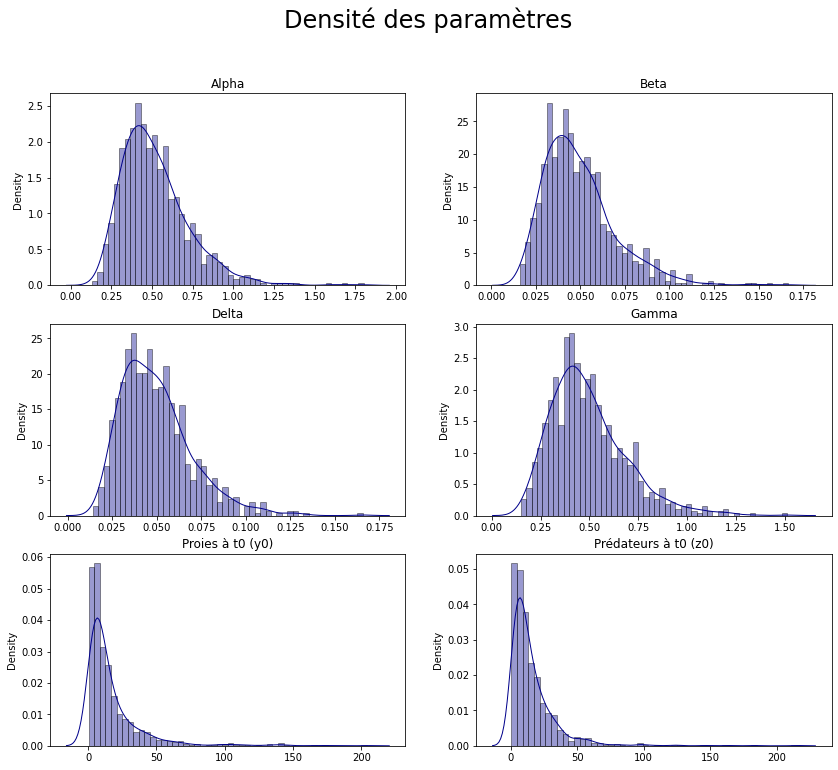

In [99]:
## Visualisation 
fig, axes = plt.subplots(3,2, figsize = (14,12))
fig.suptitle('Densité des paramètres', size = 24, )
axes[0][0].set_title('Alpha')
axes[0][1].set_title('Beta')
axes[1][0].set_title('Delta')
axes[1][1].set_title('Gamma')
axes[2][0].set_title('Proies à t0 (y0)')
axes[2][1].set_title('Prédateurs à t0 (z0)')

sns.distplot(ax = axes[0][0], x = X[:,0], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
sns.distplot(ax = axes[0][1], x = X[:,1], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
sns.distplot(ax = axes[1][0], x = X[:,2], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
sns.distplot(ax = axes[1][1], x = X[:,3], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
sns.distplot(ax = axes[2][0], x = X[:,4], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
sns.distplot(ax = axes[2][1], x = X[:,5], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})

plt.show()

In [100]:
## Et on retrouve bien empiriquement nos moments d'ordre 1 et 2 
print("Moyenne de X : ", np.mean(X, axis  = 0), "\nÉcarts-types de X {}: ".format(np.std(X, axis  = 0)))

Moyenne de X :  [ 0.51889305  0.04933237  0.04971452  0.49314589 16.7811601  15.87614981] 
Écarts-types de X [2.08343798e-01 2.01758479e-02 1.98269717e-02 1.93004437e-01
 2.16331216e+01 1.86166978e+01]: 


In [101]:
## 2.2 - On résoud le système pour un horizon de 20 ans
# N solutions correspondantes
T = 20
Sol = np.array([sol_systeme(X[i], T) for i in range(N)]) ## Taille N*2*(T+1)

In [102]:
#Sorties du modèle
y_mod = Sol[:,0,:].reshape(N,T+1) #proies
z_mod = Sol[:,1,:].reshape(N,T+1) #prédateurs

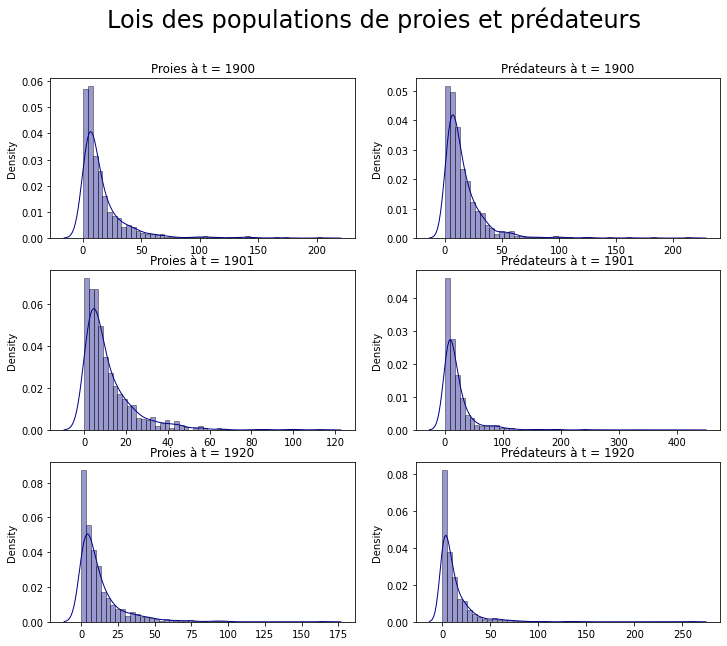

In [103]:
### 2.3 Lois de y et z, en t = 1900, 1901, 1920

fig, axes = plt.subplots(3,2, figsize = (12,10))
fig.suptitle('Lois des populations de proies et prédateurs', size = 24, )
axes[0][0].set_title('Proies à t = 1900')
axes[0][1].set_title('Prédateurs à t = 1900')
axes[1][0].set_title('Proies à t = 1901')
axes[1][1].set_title('Prédateurs à t = 1901')
axes[2][0].set_title('Proies à t = 1920')
axes[2][1].set_title('Prédateurs à t = 1920')

sns.distplot(ax = axes[0][0], x = y_mod[:,0], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
sns.distplot(ax = axes[0][1], x = z_mod[:,0], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
sns.distplot(ax = axes[1][0], x = y_mod[:,1], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
sns.distplot(ax = axes[1][1], x = z_mod[:,1], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
sns.distplot(ax = axes[2][0], x = y_mod[:,20], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
sns.distplot(ax = axes[2][1], x = z_mod[:,20], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})

plt.show()

## **<u> Question 3 <u>**

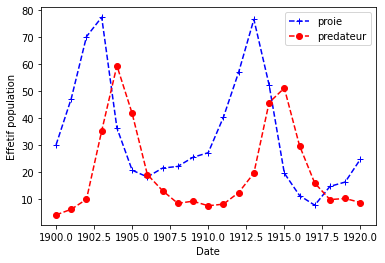

In [104]:
# Question 3. Plot données lièvres et lynx
t = np.arange(1900,1921)
y_obs = np.array([30, 47.2, 70.2, 77.4, 36.3, 20.6, 18.1, 21.4, 22, 25.4, 27.1, 40.3, 57, 76.6, 52.3, 19.5, 11.2,
7.6, 14.6, 16.2, 24.7])
z_obs = np.array([4, 6.1, 9.8, 35.2, 59.4, 41.7, 19, 13, 8.3, 9.1, 7.4, 8, 12.3, 19.5, 45.7, 51.1, 29.7, 15.8, 9.7,
10.1, 8.6])

plt.plot(t, y_obs, color= 'blue', label = 'proie', marker = '+', linestyle = '--')
plt.plot(t, z_obs, color= 'red', label = 'predateur', marker = 'o', linestyle = '--')
plt.xlabel("Date")
plt.ylabel("Effetif population")
plt.legend()
plt.show()

## **<u> Question 4 <u>**

Ici nous cherchons à ajuster au mieux le modèle (au sens des moindres carrés), sur les 20 premières années. Cela revient à trouver $x^{*}$ tel que:
$$
x^{*} = argmin_{x} \,ε(x)
$$
avec:
$$
ε(x) = \sum_{i=0}^{20}e_{proie}(x,t_{i})^{2} + e_{preda}(x,t_{i})^{2} 
$$
les erreurs respectives étant définies par: 
$$
e_{proie}(x,t_{i}) = \log N_{proie} (x,t_{i}) - \log data_{proie}(t_i) \\
e_{preda}(x,t_{i}) = \log N_{preda} (x,t_{i}) - \log data_{preda}(t_i)
$$

Nous utiliserons pour ce faire la fonction "minimize" de scipy.optimize.

In [105]:
## Question 4.

## Fonction d'erreur à minimiser
def compute_error(x) :
    '''
    Entrée :
    - x : paramètre du modèle
    
    Sortie :
    - E(x), fonction d'erreur, somme des carrés des résidus
    '''
    y_mod, z_mod = sol_systeme(x, T)
    return np.sum((np.log(y_mod) - np.log(y_obs))**2 + (np.log(z_mod) - np.log(z_obs))**2)

In [106]:
## Définition du support essentiel
## Domaine du paramètre pour l'optimisation
bnds = ((np.exp(lambda_alpha - 2 *zeta_alpha), np.exp(lambda_alpha + 2 * zeta_alpha)),
        (np.exp(lambda_beta - 2 *zeta_beta), np.exp(lambda_beta + 2 * zeta_beta)),
        (np.exp(lambda_delta - 2 *zeta_delta), np.exp(lambda_delta + 2 * zeta_delta)),
        (np.exp(lambda_gamma - 2 *zeta_gamma), np.exp(lambda_gamma + 2 * zeta_gamma)),
        (np.exp(lambda_y0 - 2 *zeta_y0), np.exp(lambda_y0 + 2 * zeta_y0)),
        (np.exp(lambda_z0 - 2 *zeta_z0), np.exp(lambda_z0 + 2 * zeta_z0)))

In [107]:
#Et on initialise le paramètre au centre des sa log-normale
x_0 = np.array([np.exp(lambda_alpha),
                np.exp(lambda_beta), 
                np.exp(lambda_delta),
                np.exp(lambda_gamma),
                np.exp(lambda_y0),
                np.exp(lambda_z0)])

In [108]:
x_0

array([ 0.46423835,  0.04642383,  0.04642383,  0.46423835, 10.        ,
       10.        ])

In [109]:
## Minimisation de l'erreur
res = minimize(fun = compute_error, x0 = x_0, tol=1e-6,  method = 'SLSQP', bounds=bnds  )
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 2.040354233543548
       x: [ 5.431e-01  2.736e-02  2.345e-02  7.915e-01  3.477e+01
            6.041e+00]
     nit: 24
     jac: [-1.543e-02 -8.728e-02 -6.440e-02 -9.714e-03 -8.088e-05
            1.866e-04]
    nfev: 184
    njev: 24

In [110]:
## paramètre optimal par calibration déterministe
x_star = res.x
x_star

array([5.43056796e-01, 2.73626106e-02, 2.34452619e-02, 7.91469961e-01,
       3.47652615e+01, 6.04133154e+00])

In [111]:
## Prédictions du modèle après calibration déterministe
y_mod, z_mod = sol_systeme(x_star, T)

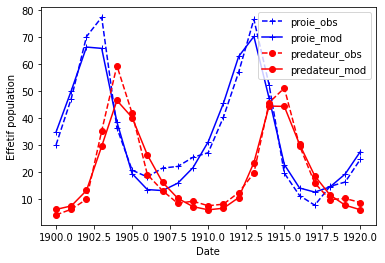

In [112]:
plt.plot(t, y_obs, color= 'blue', label = 'proie_obs', marker = '+', linestyle = '--')
plt.plot(t, y_mod, color= 'blue', label = 'proie_mod', marker = '+', linestyle = '-')
plt.plot(t, z_obs, color= 'red', label = 'predateur_obs', marker = 'o', linestyle = '--')
plt.plot(t, z_mod, color= 'red', label = 'predateur_mod', marker = 'o', linestyle = '-')
plt.xlabel("Date")
plt.ylabel("Effetif population")
plt.legend()
plt.show()

## **<u>Question 5<u>**

Expression de la vraisemblance.

Notre modèle suppose une erreur multiplicative, donc $log\_addidive ~ie~$ 
$$ ∀ i \in \{0, 1, ..., 20\}, 
\begin{cases}
ln(y_{obs, i})  &= ln(y_{mod, i}) + \epsilon_{y, i} ~~ (2) \\
ln(z_{obs, i})  &= ln(z_{mod, i}) + \epsilon_{z, i} ~~ (3)
\end{cases}
$$

\\
où, $\epsilon_{y, i} ∼ \mathcal{N}(0,\,\sigma_{y}^{2})$ et $ \epsilon_{z, i} ∼ \mathcal{N}(0,\,\sigma_{z}^{2}).$

\\
$$
\Longrightarrow 
\begin{cases}
ln(y_{obs, i})  &∼ \mathcal{N}(ln(y_{mod, i}),\,\sigma_{y}^{2})\\
ln(z_{obs, i})  &∼ \mathcal{N}(ln(z_{mod, i}),\,\sigma_{z}^{2})
\end{cases}
$$

\\
Ainsi, $∀ i \in \{0, 1, ..., 20\}$, la vraisemblance des observations $y_{obs, i}$ et $z_{obs, i}$ est:

$$
P(y_{obs, i}, z_{obs, i} / σ, x ) = \frac{1}{2\piσ_yσ_z}exp\Big[ - \frac{(ln(y_{obs, i}) - ln(y_{mod, i}))^{2}}{2 σ_{y}^{2}} - \frac{(ln(z_{obs, i}) - ln(z_{mod, i}))^{2}}{2 σ_{z}^{2}}\Big],
$$

\\
Soit la vraisemblance totale:
$$ \mathcal{L}(y_{obs}, z_{obs} / x, σ) = \frac{1}{(2\pi)^{21}σ_{y}^{21}σ_{z}^{21}}exp\Big[- \frac{1}{2σ_{y}^{2}}∑_{i = 0}^{20} ϵ_{y, i}^{2} - \frac{1}{2σ_{z}^{2}}∑_{i = 0}^{20} ϵ_{z, i}^{2} \Big] $$

\\
Dans cette question $σ$ est obtenu par Max vraisemblance, ie $\sigma^{*} = (σ_{y}^{*}, σ_{z}^{*})$ qui maximise la log vraisemblance:
$$
ln(\mathcal{L}(x, σ)) = - \Big( 21ln(2\pi) + 21ln(σ_y) + 21ln(\sigma_z) + \frac{∑_{i = 0}^{20}ϵ_{y, i}^{2}}{2σ_{y}^{2}} + \frac{∑_{i = 0}^{20}ϵ_{z, i}^{2}}{2σ_{z}^{2}}\Big)
\\
$$

$\sigma^{*}$ est un point critique, soit:

$$
\frac{∂ln(\mathcal{L}(x, σ))}{\partial σ_y} = 0 \iff -\frac{21}{σ_y} + \frac{1}{σ_{y}^{3}}∑_{i = 0}^{20} ϵ_{y, i}^{2} = 0 \Longrightarrow (σ_{y}^{*})^2 = \frac{1}{21}∑_{i = 0}^{20} ϵ_{y, i}^{2} 
$$

$$
\frac{∂ln(\mathcal{L}(x, σ))}{\partial σ_z} = 0 \iff -\frac{21}{σ_z} + \frac{1}{σ_{z}^{3}}∑_{i = 0}^{20} ϵ_{z, i}^{2} = 0 \Longrightarrow (σ_{z}^{*})^2 = \frac{1}{21}∑_{i = 0}^{20} ϵ_{z, i}^{2}
$$

## **<u>Question 6<u>**

L'approche adoptée ici est une approche plug-in. Ayant une expression pour $p(data \vert x,\sigma^{*})$, on peut exprimer, par le théorème de Bayes et à une constante multiplicative près, la loi a posteriori de $x$:
$$
p(x \vert data,\sigma^{*}) \approx p(data \vert x,\sigma^{*})p_{prior}(x)
$$


Nous générons les différents échantillons de la loi a posteriori des paramètres $x$ par un algorithme de Metropolis-Hastings (le choix s'est porté sur ce dernier car il permet justement de simuler une variable aléatoire dont la loi n'est connue qu'à une constante multiplicative près).

<u>**Récap des données à ce stade**</u>  :


    - y_obs les proies, taille T+1 = 21
    - z_obs les prédateurs, taille T+1 = 21
    - Lambda : vecteur moyenne de lnX
    - Zeta : vecteur des écarts-type de lnX, puisqu'ils sont supposés indépendants. 
    - x_star : paramètre optimal de la calibration déterministe
    - T = 20 : Horizon d'observation, en années 


In [113]:
def vraisemblance(x, sigma) :
    """
    Entrées : 
    x : taille 6, paramètres du modèle
    sigma = (sigma_y, sigma_z) : paramètres des erreurs du modèle, constant pour tout t_i
    
    Sortie : 
    res : vraisemblance des données conditionnellement à x et sigma
    """
    T = len(y_obs) - 1
    y_mod, z_mod = sol_systeme(x, T)
    
    res = np.sum((np.log(y_mod)-np.log(y_obs))**2/sigma[0]**2 + (np.log(z_mod)-np.log(z_obs))**2/sigma[1]**2)
    
    res = np.exp(-0.5*res)/((2*np.pi*sigma[0]*sigma[1])**(T+1))
    
    return res

Avec les notations définies plus haut, l'expression de la densité à priori du paramètre du modèle en un point x est donnée par :
$$ p_{prior}(x) = \frac{1}{\prod_{i=1}^n{x_i}} \frac{1}{\sqrt{(2\pi)^ndet(\Omega)}} \exp \{-\frac{1}{2}(ln(x)-L)^T\Omega^{-1}(ln(x)-L)\}$$


Où **$L$** est la moyenne et $\Omega$ la matrice de variance-covariance de $ln(x)$.

In [114]:
def densite_prior(x):
    """
    Entrée :
    x : taille 6, paramètres du modèle

    Sortie :
    La densité en x de la log normale suivie par x, donnée par la formule ci dessus.
    
    """
    n = len(x)
    res = np.exp(-0.5*np.sum(((np.log(x)-Lambda)/Zeta)**2))
    res = res/((2*np.pi)**(n/2)*np.prod(Zeta)*np.prod(x))
    
    return res


In [115]:
def compute_sigma_star() :

    y_mod, z_mod = sol_systeme(x_star, T)
    sigma_star_y = np.sqrt(np.mean((np.log(y_obs)-np.log(y_mod))**2))
    sigma_star_z = np.sqrt(np.mean((np.log(z_obs)-np.log(z_mod))**2))
    
    return sigma_star_y, sigma_star_z

In [116]:
sigma_star = compute_sigma_star()
def densite_post(x) : 
    """
    x : paramètre du modèle, dont on souhaite simuler un échantillon
    data : les données observées de 1900 à 1920
    sigma_star : le paramètre de l'erreur de modèle qui maximise la vraisemblance en x_star
    
    Sortie : 
    densité à postériori de x sachant data, sigma_star, à une constante multiplicative près
    """
    return densite_prior(x) * vraisemblance(x, sigma_star)

In [117]:
Sigma

array([2.00000000e-01, 2.00000000e-02, 2.00000000e-02, 2.00000000e-01,
       2.16119742e+01, 2.16119742e+01])

In [118]:

## Implémentation d'un algorithme de type Metropolis-Hastings, avec loi instrumentale Gaussienne
## Le paramètre s a été calibré à 0.001, faudra expliquer comment il influe les tirages 

def MetropolisHasting(pdf, n_samples = 3000, s = 0.03, burn_in = 0.1):
    """
    pdf : la mesure de proba (à une constante multiplicative près) dont on veut simuler un échantillon
    n_samples : la taille de notre chaîne de Markov
    s : coefficient d'ajustement de l'écart-type de Q(x,.), gaussienne qui sert de loi instrumentale
    
    """
    sample = []
    dim = len(x_0)
    sample.append(x_0) #On initialise la chaîne au centre du support essentiel
    n_accept = 0 ## pour le ratio d'acceptation
    
    sigma_instrumentale = Sigma ## on conserve les ratios d'ordres de grandeur  
    ##  des écarts-types de la loi à priori x pour effectuer les nouveaux tirages
    for i in range(n_samples) : 
        x_prime = sample[i] + s*sigma_instrumentale*np.random.randn(dim) 
        
        rho = pdf(x_prime)/pdf(sample[i])
        a = np.minimum(1.,rho) 
        
        u = np.random.uniform(0,1)
        if (u <= a) : 
            sample.append(x_prime)
            n_accept = n_accept + 1
        else : 
            sample.append(sample[i])
    
    sample = np.array(sample)
    print("Nombre de tirages :", n_samples)
    print("Proportion burn-in : ", int(burn_in*100), "%")
    print("Ratio d'acceptation : ",np.round(100*n_accept/n_samples, 2), "%")
    return sample[int(burn_in*n_samples):]
    
        
        

In [119]:
X_post = MetropolisHasting(densite_post)

Nombre de tirages : 3000
Proportion burn-in :  10 %
Ratio d'acceptation :  34.87 %


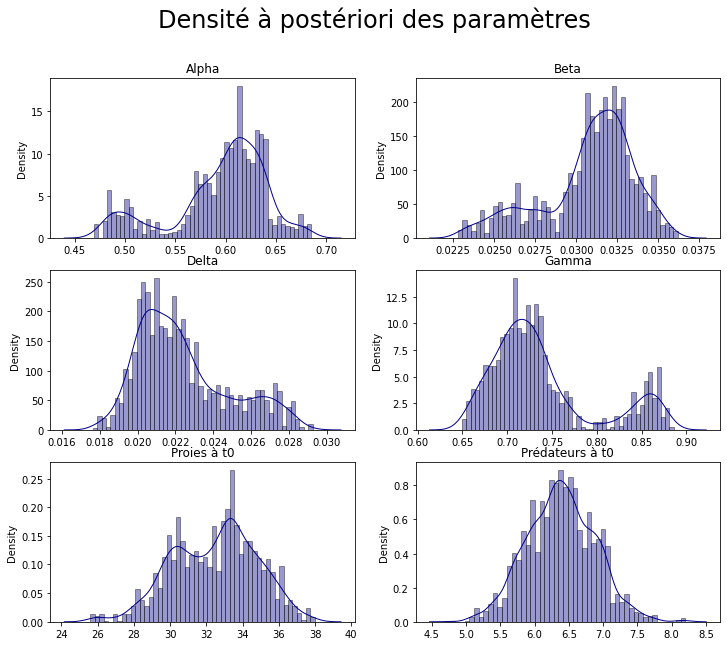

In [120]:
###  Densités à postériori des paramètres

fig, axes = plt.subplots(3,2, figsize = (12,10))
fig.suptitle('Densité à postériori des paramètres', size = 24, )
axes[0][0].set_title('Alpha')
axes[0][1].set_title('Beta')
axes[1][0].set_title('Delta')
axes[1][1].set_title('Gamma')
axes[2][0].set_title('Proies à t0')
axes[2][1].set_title('Prédateurs à t0')

sns.distplot(ax = axes[0][0], x = X_post[:,0], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
sns.distplot(ax = axes[0][1], x = X_post[:,1], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
sns.distplot(ax = axes[1][0], x = X_post[:,2], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
sns.distplot(ax = axes[1][1], x = X_post[:,3], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
sns.distplot(ax = axes[2][0], x = X_post[:,4], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
sns.distplot(ax = axes[2][1], x = X_post[:,5], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})

plt.show()

In [121]:
## En utilisant les relations (2) et (3), on peut maintenant prédire la population de lynx/lièvres à des dates futures. 
### En fait si, on va associer une prédiction à chaque tirage
n = X_post.shape[0]
Y_pred = []
Z_pred = []

T_pred = 30
for i in range (n): 
    Sol_pred = sol_systeme(X_post[i], T_pred)
    Y_pred.append(Sol_pred[0]) #proies
    Z_pred.append(Sol_pred[1]) #prédateurs

In [122]:
### Prédictions = sortie du modèle*bruit

Y_pred = np.array(Y_pred) * np.exp(sigma_star[0]*np.random.randn(n,T_pred+1))
Z_pred = np.array(Z_pred) * np.exp(sigma_star[1]*np.random.randn(n,T_pred+1))

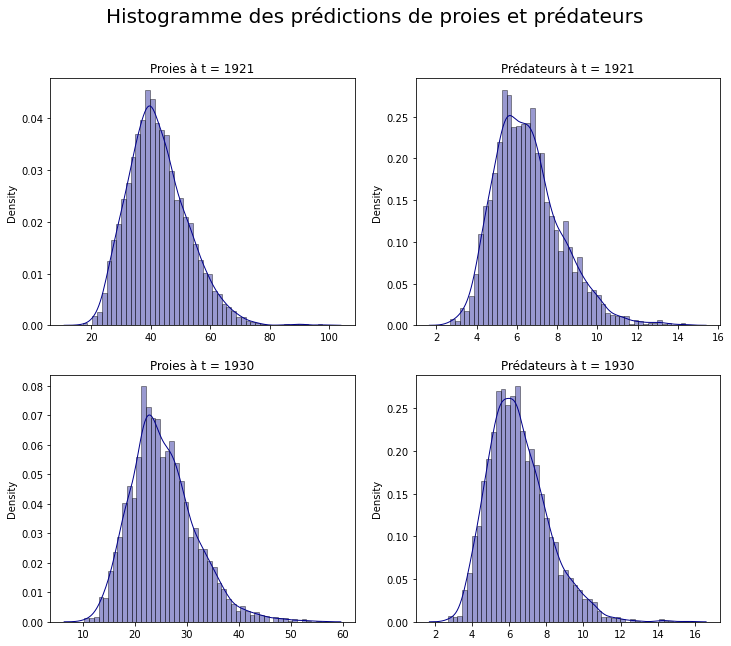

In [123]:
fig, axes = plt.subplots(2,2, figsize = (12,10))
fig.suptitle('Histogramme des prédictions de proies et prédateurs', size = 20)
axes[0][0].set_title('Proies à t = 1921')
axes[0][1].set_title('Prédateurs à t = 1921')
axes[1][0].set_title('Proies à t = 1930')
axes[1][1].set_title('Prédateurs à t = 1930')


sns.distplot(ax = axes[0][0], x = Y_pred[:,21], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
sns.distplot(ax = axes[0][1], x = Z_pred[:,21], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
sns.distplot(ax = axes[1][0], x = Y_pred[:,30], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
sns.distplot(ax = axes[1][1], x = Z_pred[:,30], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})

plt.show()

Puisque les sigma proies et prédateurs sont iid, la densité a priori de $\sigma$ est donnée par:
$$ p_{prior} = \frac{1}{2\pi\sigma_y\sigma_z\zeta^2} \exp (-\frac{(ln\sigma_y-\lambda)^2 + (ln\sigma_z-\lambda)^2}{2\zeta^2})$$

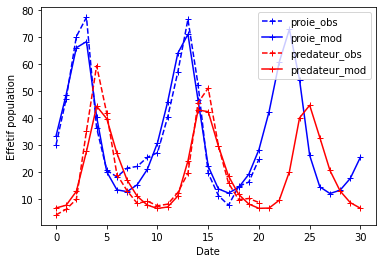

In [124]:
Y_MOD = np.mean(Y_pred,axis = 0) # Predictions du nombre de proies approche plug-in
Z_MOD = np.mean(Z_pred,axis = 0) # Predictions du nombre de predateurs approche plug-in
t = np.arange(31)
plt.plot(t[:21], y_obs, color= 'blue', label = 'proie_obs', marker = '+', linestyle = '--')
plt.plot(t, Y_MOD, color= 'blue', label = 'proie_mod', marker = '+', linestyle = '-')
plt.plot(t[:21], z_obs, color= 'red', label = 'predateur_obs', marker = '+', linestyle = '--')
plt.plot(t, Z_MOD, color= 'red', label = 'predateur_mod', marker = '+', linestyle = '-')
plt.xlabel("Date")
plt.ylabel("Effetif population")
plt.legend()
plt.show()

## **<u> Question 7**

Nous utilisons ici une approche full-bayesienne.


Nous supposons une loi a priori sur $\sigma$ (contrairement à la question 6 où nous avions fixé la valeur $\sigma$ maximisant la vraisemblance).

In [125]:
### Question 7.
## Échantilloner (x,sigma) dont la loi est connue à une constante près.

### densité à priori de sigma

zeta_sigma = 1
lambda_sigma = -1

def densite_prior_sigma(sigma_) : 
    """
    Entrées :
    - sigma_ = (sigma_y, sigma_z)
    
    Sortie :
    - la densité de proba à priori de la v.a bidimensionnelle sigma au point sigma_
    """
    num = np.exp(-((np.log(sigma_[0]) - lambda_sigma)**2 + (np.log(sigma_[1]) - lambda_sigma)**2 )/(2*zeta_sigma**2))
    denum = 2*np.pi*sigma_[0]*sigma_[1]*zeta_sigma**2
    
    return num / denum

In [126]:
def densite_post_x_sigma(x_,sigma_) : 
    return vraisemblance(x_, sigma_)*densite_prior(x_)*densite_prior_sigma(sigma_)

In [127]:
## Initialisation de sigma
sigma_0 = np.array((np.exp(lambda_sigma), np.exp(lambda_sigma)))

In [128]:
print("Initialisation de x : ",x_0.round(3), "\nInitialisation de sigma : ", sigma_0.round(3))

Initialisation de x :  [ 0.464  0.046  0.046  0.464 10.    10.   ] 
Initialisation de sigma :  [0.368 0.368]


In [129]:
### Écarts-types à priori de sigma
Sigma_sigma = np.array([compute_mu_sigma(-1,1)[1]]*2)
Sigma_sigma

array([0.7950601, 0.7950601])

In [130]:
def MetropolisHastings2(pdf, n_samples = 3000, s = 0.04, burn_in = 0.1):
    """
    pdf : la mesure de proba (à une constante multiplicative près) dont on veut simuler un échantillon
    n_samples : la taille de notre chaîne de Markov
    s : coefficient d'ajustement de l'écart-type de Q(x,.), gaussienne qui sert de loi instrumentale
    
    """
    sample_x = []
    sample_sigma = []
    sample_x.append(x_0) #On initialise la chaîne au centre du support essentiel
    sample_sigma.append(sigma_0)
    n_accept = 0 ## pour le ratio d'acceptation
    
    sigma_instrumentale = [Sigma,Sigma_sigma] ## On conserve toujours les ratios à priori
    for i in range(n_samples) : 
        x_prime = sample_x[i] + s*sigma_instrumentale[0]*np.random.randn(len(x_0)) 
        s_prime = sample_sigma[i] + s*sigma_instrumentale[1]*np.random.randn(len(sigma_0))
        rho = pdf(x_prime,s_prime)/pdf(sample_x[i],sample_sigma[i])
        #print("rho", rho)
        a = np.minimum(1.,rho) 
        
        u = np.random.uniform(0,1)
        if (u <= a) : 
            sample_x.append(x_prime)
            sample_sigma.append(s_prime)
            n_accept = n_accept + 1
        else : 
            sample_x.append(sample_x[i])
            sample_sigma.append(sample_sigma[i])
    sample_x = np.array(sample_x)
    sample_sigma = np.array(sample_sigma)
    
    print("Nombre de tirages :", n_samples)
    print("Proportion burn-in : ", int(burn_in*100), "%")
    print("Ratio d'acceptation : ",np.round(100*n_accept/n_samples, 2), "%")
    
    return sample_x[int(burn_in*n_samples):], sample_sigma[int(burn_in*n_samples):]

In [131]:
### Échantillonage de (x,sigma)
X_Sigma = MetropolisHastings2(densite_post_x_sigma)

Nombre de tirages : 3000
Proportion burn-in :  10 %
Ratio d'acceptation :  23.63 %


In [132]:
X_post = X_Sigma[0]
Sigma_post = X_Sigma[1]

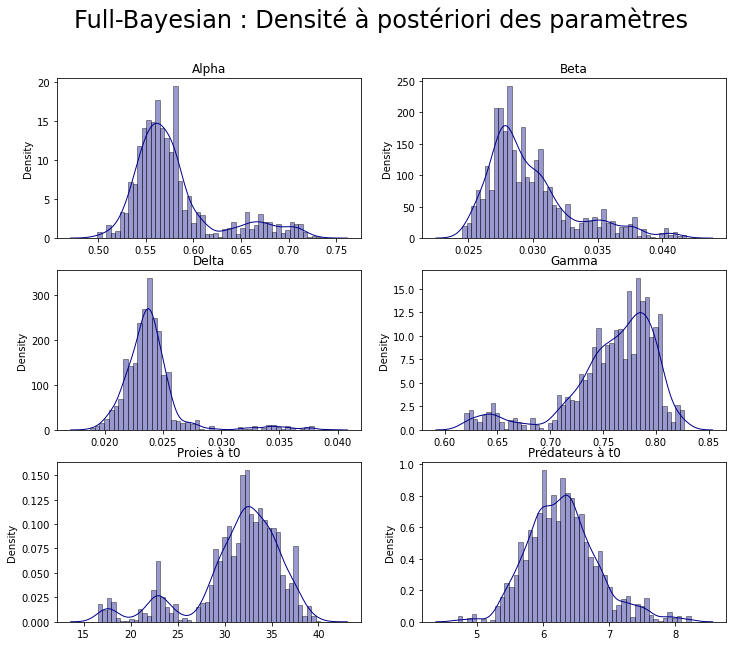

In [133]:
###  Densités à postériori des paramètres
fig, axes = plt.subplots(3,2, figsize = (12,10))
fig.suptitle('Full-Bayesian : Densité à postériori des paramètres', size = 24, )
axes[0][0].set_title('Alpha')
axes[0][1].set_title('Beta')
axes[1][0].set_title('Delta')
axes[1][1].set_title('Gamma')
axes[2][0].set_title('Proies à t0')
axes[2][1].set_title('Prédateurs à t0')

sns.distplot(ax = axes[0][0], x = X_post[:,0], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
sns.distplot(ax = axes[0][1], x = X_post[:,1], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
sns.distplot(ax = axes[1][0], x = X_post[:,2], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
sns.distplot(ax = axes[1][1], x = X_post[:,3], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
sns.distplot(ax = axes[2][0], x = X_post[:,4], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
sns.distplot(ax = axes[2][1], x = X_post[:,5], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})

plt.show()

In [134]:
## En utilisant les relations (2) et (3), on peut maintenant prédire la population de lynx/lièvres à des dates futures. 
### En fait, on va associer une prédiction à chaque tirage
n = X_post.shape[0]
Y_pred = []
Z_pred = []

T_pred = 30
for i in range (n): 
    Sol_pred = sol_systeme(X_post[i], T_pred)
    Y_pred.append(Sol_pred[0]) #proies
    Z_pred.append(Sol_pred[1]) #prédateurs
    
 

In [135]:
Y_pred = np.array(Y_pred)
Z_pred = np.array(Z_pred)

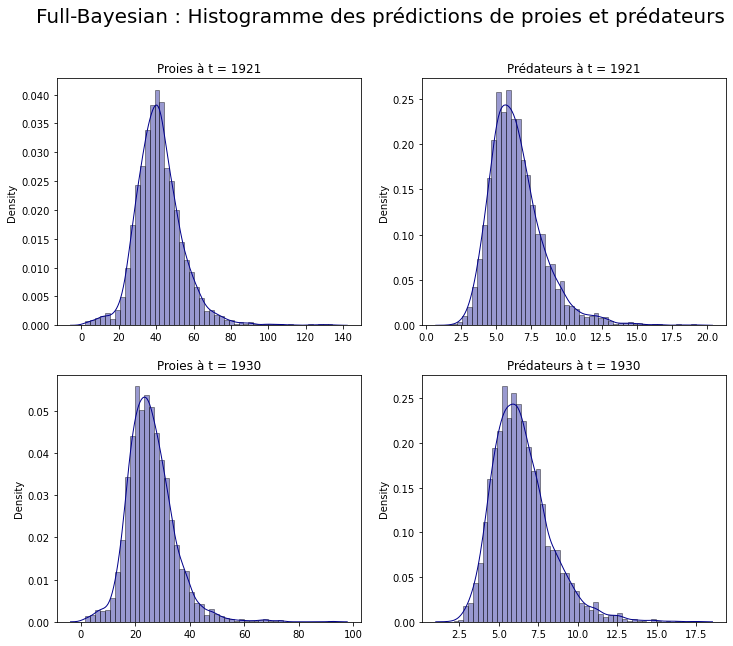

In [136]:
### Prédictions = sortie du modèle*bruit
Y_pred = Y_pred * np.exp(Sigma_post[:,0].reshape(-1,1)*np.random.randn(n,T_pred+1))
Z_pred = Z_pred* np.exp(Sigma_post[:,1].reshape(-1,1)*np.random.randn(n,T_pred+1))

fig, axes = plt.subplots(2,2, figsize = (12,10))
fig.suptitle('Full-Bayesian : Histogramme des prédictions de proies et prédateurs', size = 20)
axes[0][0].set_title('Proies à t = 1921')
axes[0][1].set_title('Prédateurs à t = 1921')
axes[1][0].set_title('Proies à t = 1930')
axes[1][1].set_title('Prédateurs à t = 1930')


sns.distplot(ax = axes[0][0], x = Y_pred[:,21], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
sns.distplot(ax = axes[0][1], x = Z_pred[:,21], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
sns.distplot(ax = axes[1][0], x = Y_pred[:,30], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
sns.distplot(ax = axes[1][1], x = Z_pred[:,30], bins = 50,color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})

plt.show()

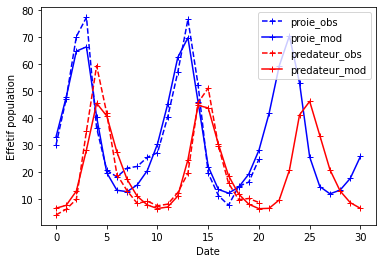

In [137]:
Y_MOD = np.mean(Y_pred,axis = 0) # Predictions du nombre de proies approche plug-in
Z_MOD = np.mean(Z_pred,axis = 0) # Predictions du nombre de predateurs approche plug-in
t = np.arange(31)
plt.plot(t[:21], y_obs, color= 'blue', label = 'proie_obs', marker = '+', linestyle = '--')
plt.plot(t, Y_MOD, color= 'blue', label = 'proie_mod', marker = '+', linestyle = '-')
plt.plot(t[:21], z_obs, color= 'red', label = 'predateur_obs', marker = '+', linestyle = '--')
plt.plot(t, Z_MOD, color= 'red', label = 'predateur_mod', marker = '+', linestyle = '-')
plt.xlabel("Date")
plt.ylabel("Effetif population")
plt.legend()
plt.show()

## <u>Conclusion</u>



Nous avons réalisé 3 approches différentes pour la calibration des paramètres du modèle proie-prédateur Lotka-Volterra. 
#### 1. L'approche déterministe. 
Avec un modèle log-normal du paramètre x, on a réalisé une optimisation numérique et ainsi approcher au mieux les valeurs observées de 1900 à 1920.

#### 2. L'approche semi-bayésienne
Ici, nous avons déterminé d'abord le paramètre de l'erreur de modèle, par Maximum de Vraisemblance, puis grâce à lui et aux données observées, ajusté notre loi à priori sur le paramètre x. 
Les Histogrammes de prédiction obtenus sont relativement convaincants : les concentrations de l'effectif des proies autour de 33, et des prédateurs autour de 6.5 réflète bien les observations.

#### 3. L'approche full-bayésienne
Ici, on a considéré une inférence bayésienne englobant les paramètres d'erreur de modèle.
De même que dans le cas précédent, les résultats sont globalement convaincants. 


Cependant, faute de temps, nous n'avons pas pu implémenter le cas d'erreur additive.